In [ ]:
# Import all required libraries

import pandas as pd
import seaborn as sns
import numpy as np
import os
import tqdm
import time
import cv2
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.manifold import TSNE

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

# Define paths to the directories containing the images
normal_dir = '/content/drive/MyDrive/Segmented/Normal'
scoliosis_dir = '/content/drive/MyDrive/Scoliosis'

# Create a list to store the results
results = []

# Function to process images
def process_images(image_dir, label):
    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', 'tif')):
            # Load the image in grayscale
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Get image dimensions
            height, width = image.shape

            # Divide the image into left and right halves
            midpoint = width // 2
            left_side_image = image[:, :midpoint]
            right_side_image = image[:, midpoint:]

            # Calculate histogram for left side
            hist_left = cv2.calcHist([left_side_image], [0], None, [256], [0, 256]).flatten()

            # Calculate histogram for right side
            hist_right = cv2.calcHist([right_side_image], [0], None, [256], [0, 256]).flatten()

            # Compare histograms using correlation
            comparison = cv2.compareHist(hist_left, hist_right, cv2.HISTCMP_CORREL)

            # Append results to the list
            results.append([filename, label, comparison])

# Process images in both directories
process_images(normal_dir, 'normal')
process_images(scoliosis_dir, 'scoliosis')

# Create a DataFrame from the results
df = pd.DataFrame(results, columns=['Filename', 'Label', 'Histogram_Correlation'])

# Save the DataFrame to a CSV file
output_csv_path = '/content/drive/MyDrive/Scoliosis/histogram_analysis_results.csv'
df.to_csv(output_csv_path, index=False)

print(f'Results saved to {output_csv_path}')

# New Section

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image in grayscale
image_path = '/content/drive/MyDrive/Scoliosis/Segmente/ScolFinalSegmented/Scolfinal4.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

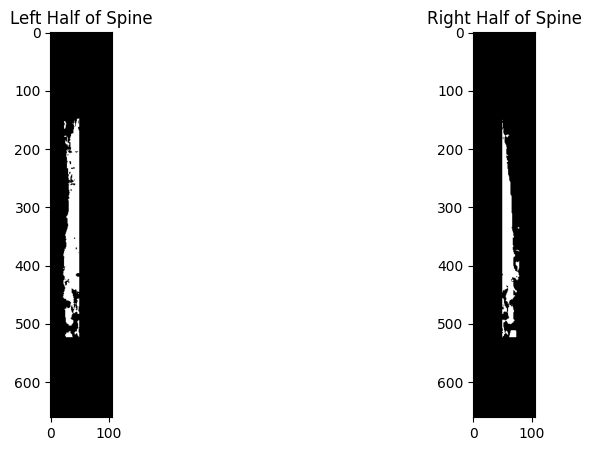

In [ ]:
# Compute the bounding box of the contour
x, y, w, h = cv2.boundingRect(spine_contour)

# Split the bounding box into left and right
left_half_mask = np.zeros_like(image)
right_half_mask = np.zeros_like(image)

left_half_mask[y:y+h, x:x+w//2] = 1
right_half_mask[y:y+h, x+w//2:x+w] = 1

# Apply the masks to the spine region
left_half_spine = cv2.bitwise_and(spine_mask, spine_mask, mask=left_half_mask)
right_half_spine = cv2.bitwise_and(spine_mask, spine_mask, mask=right_half_mask)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(left_half_spine, cmap='gray')
plt.title('Left Half of Spine')

plt.subplot(1, 2, 2)
plt.imshow(right_half_spine, cmap='gray')
plt.title('Right Half of Spine')

plt.show()

In [ ]:
# Calculate histogram for left half
hist_left = cv2.calcHist([left_half_spine], [0], None, [256], [0, 256]).flatten()

# Calculate histogram for right half
hist_right = cv2.calcHist([right_half_spine], [0], None, [256], [0, 256]).flatten()

Correlation between left and right halves: 0.9996309045557381


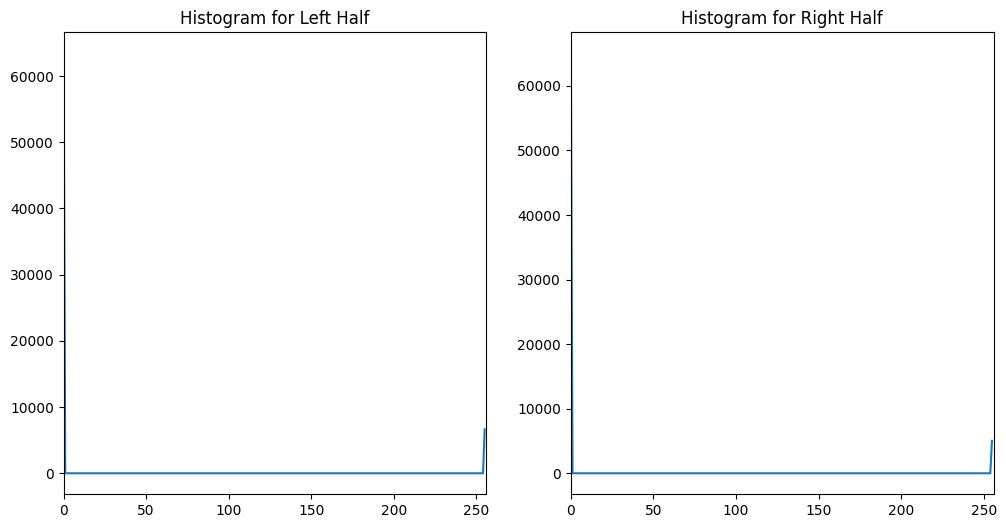

In [ ]:
# Compare histograms using correlation
comparison = cv2.compareHist(hist_left, hist_right, cv2.HISTCMP_CORREL)

print(f'Correlation between left and right halves: {comparison}')

# Plot the histograms for visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Histogram for Left Half')
plt.plot(hist_left)
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.title('Histogram for Right Half')
plt.plot(hist_right)
plt.xlim([0, 256])

plt.show()

In [ ]:
! pip install torch torchvision torchaudio
! pip install opencv-python
! pip install segment-anything


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import os
from PIL import Image
import numpy as np

scoliosis_image_path = "/content/drive/MyDrive/Scoliosis/"

scoliosis_image_list = []
scoliosis_image_labels = []

scoliosis_final = "/content/drive/MyDrive/Scoliosis"
scoliosis_final = []

scoliosis_none = "/content/drive/MyDrive/Scoliosis/Normal"
scoliosis_none = []

for scoliosis_folder in ["Scoliosis", "Normal"]:
    scoliosis_folder_path = os.path.join(scoliosis_image_path, scoliosis_folder)

    for scoliosis_image_file in os.listdir(scoliosis_folder_path):
        scoliosis_image_file_path = os.path.join(scoliosis_folder_path, scoliosis_image_file)
        scoliosis_image = Image.open(scoliosis_image_file_path)

        scoliosis_image = scoliosis_image.resize((224, 224))
        scoliosis_image = scoliosis_image.convert("L") # this converts to gayscale (keep or remove???)

        scoliosis_image_list.append(np.array(scoliosis_image))

        if scoliosis_folder == "Scoliosis":
            scoliosis_image_labels.append("Scol")
            scoliosis_final.append("Scol")
        elif scoliosis_folder == "Normal":
            scoliosis_image_labels.append("Normal")
            scoliosis_none.append("Normal")

scoliosis_image_list = np.array(scoliosis_image_list)


In [ ]:
xx = 0
yy = 1
zz = 2
xx = yy
zz = xx
zz = yy*2

print(xx, yy, zz)

1 1 2


In [ ]:
scoliosis_image_list.shape

(45, 50, 50)

In [ ]:
scoliosis_data = np.reshape(scoliosis_image_list, (scoliosis_image_list.shape[0], -1))
scoliosis_data = StandardScaler().fit_transform(scoliosis_data)

scoliosis_data.shape

(45, 2500)

In [ ]:
len(scoliosis_image_labels)

45

In [ ]:
np.std(scoliosis_data, axis = 0)

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
scoliosis_image_labels = np.array(scoliosis_image_labels)

In [ ]:
scoliosis_log_reg_model = LogisticRegression() # logreg
scoliosis_linear_svc_model = LinearSVC() # linear svc
scoliosis_knn_model = KNeighborsClassifier(n_neighbors=3) # knn

def scoliosis_permute_labels(y):
    return shuffle(y)

scoliosis_N_permutations = 10

scoliosis_models = {
    "Logistic Regression": scoliosis_log_reg_model,
    "Linear SVC": scoliosis_linear_svc_model,
    "KNN": scoliosis_knn_model,
}

scoliosis_permuted_accuracies = {model_name: [] for model_name in scoliosis_models.keys()}
scoliosis_accuracies = {model_name: [] for model_name in scoliosis_models.keys()}

scoliosis_scaler = StandardScaler()

for i in tqdm.tqdm(range(scoliosis_N_permutations)):
    subset_index = np.random.randint(0, len(scoliosis_image_labels), size=1000)
    scoliosis_data_subset = scoliosis_data[subset_index, :]
    scoliosis_labels_subset = scoliosis_image_labels[subset_index]

    scoliosis_x_train, scoliosis_x_test, scoliosis_y_train, scoliosis_y_test = train_test_split(scoliosis_data_subset, scoliosis_labels_subset)

    scoliosis_permuted_y_test = scoliosis_permute_labels(scoliosis_y_test)


    for scoliosis_model_name, scoliosis_model in scoliosis_models.items():
        scoliosis_model.fit(scoliosis_x_train, scoliosis_y_train)
        scoliosis_y_pred = scoliosis_model.predict(scoliosis_x_test)

        scoliosis_permuted_accuracy = accuracy_score(scoliosis_permuted_y_test, scoliosis_y_pred)
        scoliosis_permuted_accuracies[scoliosis_model_name].append(scoliosis_permuted_accuracy)

        scoliosis_accuracy = accuracy_score(scoliosis_y_test, scoliosis_y_pred)
        scoliosis_accuracies[scoliosis_model_name].append(scoliosis_accuracy)


for scoliosis_model_name, scoliosis_model_model in scoliosis_models.items():
    scoliosis_mean_accuracy = np.mean(scoliosis_accuracies[scoliosis_model_name])
    print(f"{scoliosis_model_name} Mean Accuracy: {scoliosis_mean_accuracy}")

In [ ]:
import os
import cv2
import numpy as np
import tqdm
from skimage.feature import hog
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Define paths to the directories containing the images
base_dir = '/content/drive/MyDrive/Scoliosis/Threshold'
normal_dir = os.path.join(base_dir, 'Normal')
scoliosis_dir = os.path.join(base_dir, 'Scoliosis')

# Function to load images and extract HOG features
def load_images_and_extract_features(image_dir, label):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg','tif')):
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (128, 128))  # Resize to a fixed size
            image = image / 255.0  # Normalize pixel values
            hog_features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
            images.append(hog_features)
            labels.append(label)
    return images, labels

# Load and extract features for normal and scoliosis images
normal_images, normal_labels = load_images_and_extract_features(normal_dir, 0)
scoliosis_images, scoliosis_labels = load_images_and_extract_features(scoliosis_dir, 1)

# Combine the images and labels
features = np.array(normal_images + scoliosis_images)
labels = np.array(normal_labels + scoliosis_labels)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Feature selection
selector = SelectKBest(f_classif, k=20)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)

# Define models
scoliosis_log_reg_model = LogisticRegression(max_iter=10000, penalty='l2', C=1.0)  # Logistic Regression
scoliosis_linear_svc_model = LinearSVC()  # Linear SVC
scoliosis_knn_model = KNeighborsClassifier(n_neighbors=3)  # KNN
scoliosis_rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)  # Random Forest

scoliosis_models = {
    "Logistic Regression": scoliosis_log_reg_model,
    "Linear SVC": scoliosis_linear_svc_model,
    "KNN": scoliosis_knn_model,
    "Random Forest": scoliosis_rf_model
}

scoliosis_permuted_accuracies = {model_name: [] for model_name in scoliosis_models.keys()}
scoliosis_accuracies = {model_name: [] for model_name in scoliosis_models.keys()}

scoliosis_scaler = StandardScaler()

scoliosis_N_permutations = 5

def scoliosis_permute_labels(y):
    return shuffle(y)

for i in tqdm.tqdm(range(scoliosis_N_permutations)):
    subset_index = np.random.randint(0, len(labels), size=1000)
    scoliosis_data_subset = features[subset_index, :]
    scoliosis_labels_subset = labels[subset_index]

    scoliosis_x_train, scoliosis_x_test, scoliosis_y_train, scoliosis_y_test = train_test_split(scoliosis_data_subset, scoliosis_labels_subset)

    scoliosis_permuted_y_test = scoliosis_permute_labels(scoliosis_y_test)

    for scoliosis_model_name, scoliosis_model in scoliosis_models.items():
        scoliosis_model.fit(scoliosis_x_train, scoliosis_y_train)
        scoliosis_y_pred = scoliosis_model.predict(scoliosis_x_test)

        scoliosis_permuted_accuracy = accuracy_score(scoliosis_permuted_y_test, scoliosis_y_pred)
        scoliosis_permuted_accuracies[scoliosis_model_name].append(scoliosis_permuted_accuracy)

        scoliosis_accuracy = accuracy_score(scoliosis_y_test, scoliosis_y_pred)
        scoliosis_accuracies[scoliosis_model_name].append(scoliosis_accuracy)

for scoliosis_model_name, scoliosis_model in scoliosis_models.items():
    scoliosis_mean_accuracy = np.mean(scoliosis_accuracies[scoliosis_model_name])
    print(f"{scoliosis_model_name} Mean Accuracy: {scoliosis_mean_accuracy}")

# Evaluate on the validation set
for scoliosis_model_name, scoliosis_model in scoliosis_models.items():
    scoliosis_model.fit(X_train_selected, y_train)
    y_val_pred = scoliosis_model.predict(X_val_selected)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f'{scoliosis_model_name} Validation accuracy: {val_accuracy}')

# Evaluate on the test set
for scoliosis_model_name, scoliosis_model in scoliosis_models.items():
    y_test_pred = scoliosis_model.predict(X_test_selected)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'{scoliosis_model_name} Test accuracy: {test_accuracy}')


100%|██████████| 5/5 [01:24<00:00, 16.83s/it]


Logistic Regression Mean Accuracy: 1.0
Linear SVC Mean Accuracy: 1.0
KNN Mean Accuracy: 1.0
Random Forest Mean Accuracy: 1.0
Logistic Regression Validation accuracy: 0.6923076923076923
Linear SVC Validation accuracy: 0.6153846153846154
KNN Validation accuracy: 0.7692307692307693
Random Forest Validation accuracy: 0.6923076923076923
Logistic Regression Test accuracy: 0.7142857142857143
Linear SVC Test accuracy: 0.7857142857142857
KNN Test accuracy: 0.8571428571428571
Random Forest Test accuracy: 0.7857142857142857


In [ ]:
import os
import cv2
import numpy as np
import tqdm
from skimage.feature import hog
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Define paths to the directories containing the images
base_dir = '/content/drive/MyDrive/Scoliosis/Threshold'
normal_dir = os.path.join(base_dir, 'Normal')
scoliosis_dir = os.path.join(base_dir, 'Scoliosis')

# Function to load images and extract HOG features
def load_images_and_extract_features(image_dir, label):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', 'tif')):
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (128, 128))  # Resize to a fixed size
            image = image / 255.0  # Normalize pixel values
            hog_features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
            images.append(hog_features)
            labels.append(label)
    return images, labels

# Load and extract features for normal and scoliosis images
normal_images, normal_labels = load_images_and_extract_features(normal_dir, 0)
scoliosis_images, scoliosis_labels = load_images_and_extract_features(scoliosis_dir, 1)

# Combine the images and labels
features = np.array(normal_images + scoliosis_images)
labels = np.array(normal_labels + scoliosis_labels)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Feature selection
selector = SelectKBest(f_classif, k=20)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)

# Define models
scoliosis_log_reg_model = LogisticRegression(max_iter=10000, penalty='l2', C=1.0)  # Logistic Regression
scoliosis_linear_svc_model = LinearSVC()  # Linear SVC
scoliosis_knn_model = KNeighborsClassifier(n_neighbors=3)  # KNN
scoliosis_rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)  # Random Forest

scoliosis_models = {
    "Logistic Regression": scoliosis_log_reg_model,
    "Linear SVC": scoliosis_linear_svc_model,
    "KNN": scoliosis_knn_model,
    "Random Forest": scoliosis_rf_model
}

# Using k-fold cross-validation to get more robust estimates of model performance
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoliosis_accuracies = {model_name: [] for model_name in scoliosis_models.keys()}

for scoliosis_model_name, scoliosis_model in scoliosis_models.items():
    for train_index, val_index in kf.split(X_train_selected):
        X_train_kf, X_val_kf = X_train_selected[train_index], X_train_selected[val_index]
        y_train_kf, y_val_kf = y_train[train_index], y_train[val_index]

        scoliosis_model.fit(X_train_kf, y_train_kf)
        y_val_pred_kf = scoliosis_model.predict(X_val_kf)
        val_accuracy_kf = accuracy_score(y_val_kf, y_val_pred_kf)
        scoliosis_accuracies[scoliosis_model_name].append(val_accuracy_kf)

for scoliosis_model_name, accuracies in scoliosis_accuracies.items():
    mean_accuracy = np.mean(accuracies)
    print(f"{scoliosis_model_name} Mean Cross-Validation Accuracy: {mean_accuracy}")

# Final evaluation on the test set
for scoliosis_model_name, scoliosis_model in scoliosis_models.items():
    scoliosis_model.fit(X_train_selected, y_train)
    y_val_pred = scoliosis_model.predict(X_val_selected)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f'{scoliosis_model_name} Validation accuracy: {val_accuracy}')

    y_test_pred = scoliosis_model.predict(X_test_selected)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'{scoliosis_model_name} Test accuracy: {test_accuracy}')


Logistic Regression Mean Cross-Validation Accuracy: 0.8380952380952381
Linear SVC Mean Cross-Validation Accuracy: 0.9047619047619048
KNN Mean Cross-Validation Accuracy: 0.9047619047619048
Random Forest Mean Cross-Validation Accuracy: 0.8380952380952381
Logistic Regression Validation accuracy: 0.7142857142857143
Logistic Regression Test accuracy: 0.5714285714285714
Linear SVC Validation accuracy: 0.7142857142857143
Linear SVC Test accuracy: 0.5714285714285714
KNN Validation accuracy: 0.7142857142857143
KNN Test accuracy: 0.5714285714285714
Random Forest Validation accuracy: 0.42857142857142855
Random Forest Test accuracy: 0.5714285714285714


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define paths to the directories containing the images
base_dir = '/content/drive/MyDrive/Scoliosis/Threshold'
normal_dir = os.path.join(base_dir, 'Normal')
scoliosis_dir = os.path.join(base_dir, 'Scoliosis')

# Function to load images and extract HOG features
def load_images_and_extract_features(image_dir, label):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (128, 128))  # Resize to a fixed size
            image = image / 255.0  # Normalize pixel values
            hog_features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
            images.append(hog_features)
            labels.append(label)
    return images, labels

# Load and extract features for normal and scoliosis images
normal_images, normal_labels = load_images_and_extract_features(normal_dir, 0)
scoliosis_images, scoliosis_labels = load_images_and_extract_features(scoliosis_dir, 1)

# Combine the images and labels
features = np.array(normal_images + scoliosis_images)
labels = np.array(normal_labels + scoliosis_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [ ]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=100000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=30)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print the accuracies
print(f'Logistic Regression accuracy: {lr_accuracy}')
print(f'K-Nearest Neighbors accuracy: {knn_accuracy}')
print(f'Random Forest accuracy: {rf_accuracy}')


Logistic Regression accuracy: 0.75
K-Nearest Neighbors accuracy: 0.3333333333333333
Random Forest accuracy: 0.5


In [ ]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

# Load and preprocess the dataset as before
# ...

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Feature selection
selector = SelectKBest(f_classif, k=20)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)

# Logistic Regression with regularization
lr_model = LogisticRegression(max_iter=10000, penalty='l2', C=1.0)
lr_model.fit(X_train_selected, y_train)
y_val_pred_lr = lr_model.predict(X_val_selected)
val_lr_accuracy = accuracy_score(y_val, y_val_pred_lr)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_selected, y_train)
y_val_pred_knn = knn_model.predict(X_val_selected)
val_knn_accuracy = accuracy_score(y_val, y_val_pred_knn)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_selected, y_train)
y_val_pred_rf = rf_model.predict(X_val_selected)
val_rf_accuracy = accuracy_score(y_val, y_val_pred_rf)

# Cross-validation for Logistic Regression
cv_scores_lr = cross_val_score(lr_model, features, labels, cv=5)

# Print the results
print(f'Validation Logistic Regression accuracy: {val_lr_accuracy}')
print(f'Validation K-Nearest Neighbors accuracy: {val_knn_accuracy}')
print(f'Validation Random Forest accuracy: {val_rf_accuracy}')
print(f'Cross-Validation Logistic Regression scores: {cv_scores_lr}')
print(f'Mean Cross-Validation Logistic Regression score: {np.mean(cv_scores_lr)}')

# Evaluate on the test set
y_test_pred_lr = lr_model.predict(X_test_selected)
test_lr_accuracy = accuracy_score(y_test, y_test_pred_lr)

y_test_pred_knn = knn_model.predict(X_test_selected)
test_knn_accuracy = accuracy_score(y_test, y_test_pred_knn)

y_test_pred_rf = rf_model.predict(X_test_selected)
test_rf_accuracy = accuracy_score(y_test, y_test_pred_rf)

# Print the test accuracies
print(f'Test Logistic Regression accuracy: {test_lr_accuracy}')
print(f'Test K-Nearest Neighbors accuracy: {test_knn_accuracy}')
print(f'Test Random Forest accuracy: {test_rf_accuracy}')


Validation Logistic Regression accuracy: 0.5555555555555556
Validation K-Nearest Neighbors accuracy: 0.6666666666666666
Validation Random Forest accuracy: 0.5555555555555556
Cross-Validation Logistic Regression scores: [0.83333333 0.91666667 0.83333333 0.66666667 0.91666667]
Mean Cross-Validation Logistic Regression score: 0.8333333333333334
Test Logistic Regression accuracy: 0.7777777777777778
Test K-Nearest Neighbors accuracy: 0.4444444444444444
Test Random Forest accuracy: 0.5555555555555556


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 574ms/step - accuracy: 0.4710 - loss: 0.6921 - val_accuracy: 0.7407 - val_loss: 0.6728
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6184 - loss: 0.6699 - val_accuracy: 0.6667 - val_loss: 0.6661
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5736 - loss: 0.6790 - val_accuracy: 0.7778 - val_loss: 0.6411
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7271 - loss: 0.6360 - val_accuracy: 0.5926 - val_loss: 0.6538
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5397 - loss: 0.6284 - val_accuracy: 0.4074 - val_loss: 0.7167
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5083 - loss: 0.6065 - val_accuracy: 0.6667 - val_loss: 0.6158
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8388 - loss: 0.5637 - val_accuracy: 0.7778 - val_loss: 0.5615
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8178 - loss: 0.5493 - val_accuracy: 0.7778 - val_loss

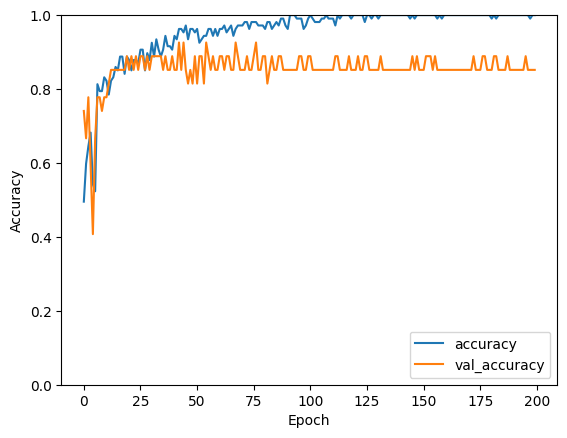

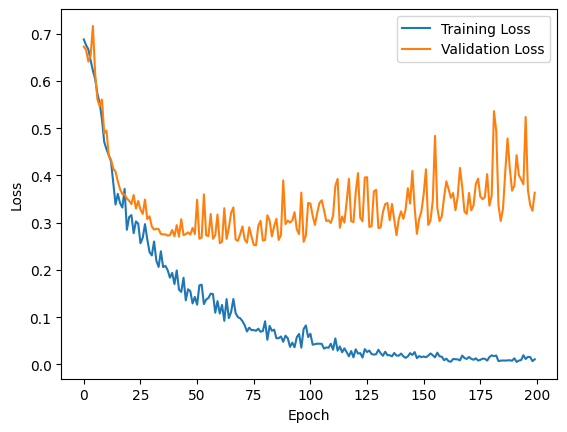

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# Define paths to the directories containing the images
base_dir = '/content/drive/MyDrive/Scoliosis/Segmente'
normal_dir = os.path.join(base_dir, 'Normal')
scoliosis_dir = os.path.join(base_dir, 'Scoliosis')

# Function to load and preprocess images
def load_and_preprocess_images(image_dir, label, image_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', 'tif')):
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)  # Resize to a fixed size
            image = image / 255.0  # Normalize pixel values
            images.append(image)
            labels.append(label)
    return images, labels

# Load and preprocess images
normal_images, normal_labels = load_and_preprocess_images(normal_dir, 0)
scoliosis_images, scoliosis_labels = load_and_preprocess_images(scoliosis_dir, 1)

# Combine the images and labels
images = np.array(normal_images + scoliosis_images)
labels = np.array(normal_labels + scoliosis_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Custom callback to stop training when validation loss is below 0.15
class TerminateOnBaseline(Callback):
    def __init__(self, monitor='val_loss', baseline=0.10):
        super(TerminateOnBaseline, self).__init__()
        self.monitor = monitor
        self.baseline = baseline

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        current = logs.get(self.monitor)
        if current is not None:
            if current < self.baseline:
                print(f'\nEpoch {epoch + 1}: {self.monitor} reached below {self.baseline}. Stopping training.')
                self.model.stop_training = True

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=200, verbose=1, restore_best_weights=True)

# Define the custom callback
terminate_on_baseline = TerminateOnBaseline(monitor='val_loss', baseline=0.10)

checkpoint_dir = '/content/drive/MyDrive/model_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, "model_checkpoint.keras")
checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping, terminate_on_baseline])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


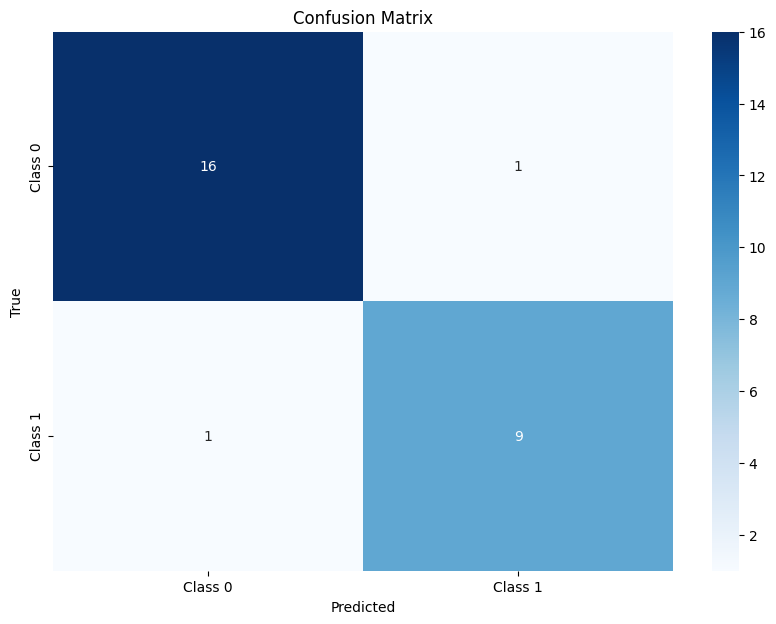

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test are the true labels and y_pred are the predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary classes (0 or 1)

cm = confusion_matrix(y_test, y_pred_classes) # Remove argmax since y_test is 1D

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], # Adjust labels as needed
            yticklabels=['Class 0', 'Class 1']) # Adjust labels as needed
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np

# Function to evaluate model multiple times
def evaluate_model(model, X_test, y_test, num_runs=10):
    accuracies = []
    for _ in range(num_runs):
        # Re-initialize or reset model if necessary
        model = model  # Define and compile your model here
        model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        accuracies.append(test_acc)
    return np.mean(accuracies), np.std(accuracies)

mean_acc, std_acc = evaluate_model(model, X_test, y_test)
print(f"Mean Test Accuracy: {mean_acc:.2f} ± {std_acc:.2f}")

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9696 - loss: 0.0516 - val_accuracy: 0.8889 - val_loss: 0.1755
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9790 - loss: 0.0370 - val_accuracy: 0.8889 - val_loss: 0.2042
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9884 - loss: 0.0326 - val_accuracy: 0.8889 - val_loss: 0.1787
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9794 - loss: 0.0378 - val_accuracy: 0.8889 - val_loss: 0.2504
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9490 - loss: 0.0712 - val_accuracy: 0.8889 - val_loss: 0.4362
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9455 - loss: 0.0845 - val_accuracy: 0.8519 - val_loss: 0.1889
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9884 - loss: 0.0427 - val_accuracy: 0.9259 - val_loss: 0.2117
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9821 - loss: 0.0581 - val_accuracy: 0.8889 - val_loss:

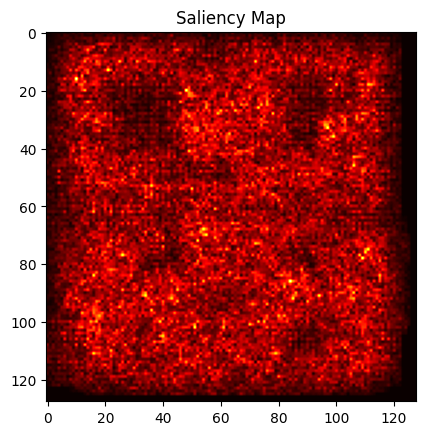

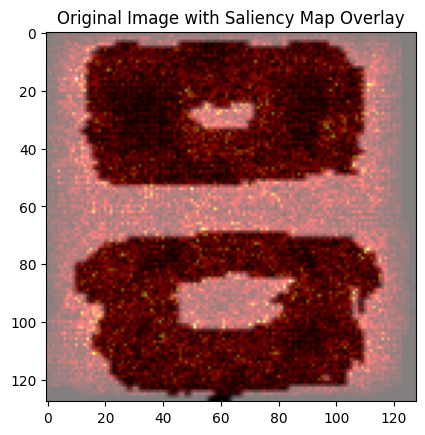

In [ ]:
def compute_saliency_map(model, image, class_index):
    image = tf.convert_to_tensor(image)
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(tf.expand_dims(image, axis=0))
        # Access the single output value correctly
        loss = prediction[0, 0]  # Changed from [0, class_index]
    grads = tape.gradient(loss, image)
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)
    return saliency.numpy()

# Select an image and class index to visualize
test_image = X_test[1]
class_index = 0 if y_test[0] == 0 else 1  # This line is likely unnecessary now
saliency_map = compute_saliency_map(model, test_image, class_index)

plt.imshow(saliency_map, cmap='hot')
plt.title('Saliency Map')
plt.show()
# Grad-CAM
def overlay_saliency_map(image, saliency_map, alpha=0.5):
    # Ensure saliency_map is normalized to [0, 1]
    saliency_map = (saliency_map - np.min(saliency_map)) / (np.max(saliency_map) - np.min(saliency_map))
    saliency_map = plt.get_cmap('hot')(saliency_map)  # Convert to RGB with heatmap colors
    saliency_map = saliency_map[:, :, :3]  # Remove alpha channel
    overlay = (alpha * saliency_map + (1 - alpha) * image)
    return overlay

# Normalize and overlay saliency map
original_image = X_test[1]  # Original image
saliency_overlay = overlay_saliency_map(original_image, saliency_map)

plt.imshow(saliency_overlay)
plt.title('Original Image with Saliency Map Overlay')
plt.show()



In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define paths to the directories containing the images
base_dir = '/content/drive/MyDrive/Scoliosis/Threshold'
normal_dir = os.path.join(base_dir, 'Normal')
scoliosis_dir = os.path.join(base_dir, 'Scoliosis')

# Function to load and extract features (using HOG as an example)
def load_images_and_extract_features(image_dir, label, image_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', 'tif')):
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)  # Resize to a fixed size
            image = image / 255.0  # Normalize pixel values
            # Here you would extract HOG features or other features
            # For simplicity, flatten the image for demonstration
            features = image.flatten()
            images.append(features)
            labels.append(label)
    return images, labels

# Load and preprocess images
normal_images, normal_labels = load_images_and_extract_features(normal_dir, 0)
scoliosis_images, scoliosis_labels = load_images_and_extract_features(scoliosis_dir, 1)

# Combine the images and labels
features = np.array(normal_images + scoliosis_images)
labels = np.array(normal_labels + scoliosis_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Test Accuracy: 0.6111111111111112
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.67      0.60      0.63        10

    accuracy                           0.61        18
   macro avg       0.61      0.61      0.61        18
weighted avg       0.62      0.61      0.61        18



In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define paths to the directories containing the images
base_dir = '/content/drive/MyDrive/Scoliosis/Threshold'
normal_dir = os.path.join(base_dir, 'Normal')
scoliosis_dir = os.path.join(base_dir, 'Scoliosis')

# Function to load and extract features (using HOG as an example)
def load_images_and_extract_features(image_dir, image_size=(128, 128)):
    images = []
    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', 'tif')):
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)  # Resize to a fixed size
            image = image / 255.0  # Normalize pixel values
            features = image.flatten()  # Flatten the image
            images.append(features)
    return images

# Load and preprocess images
normal_images = load_images_and_extract_features(normal_dir)
scoliosis_images = load_images_and_extract_features(scoliosis_dir)

# Combine the images
features = np.array(normal_images + scoliosis_images)
# Create labels for linear regression (for demonstration, we'll use numeric labels here)
labels = np.array([0] * len(normal_images) + [1] * len(scoliosis_images))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# For demonstration, let's print the first few predictions and true values
print("First few predictions:", y_pred[:10])
print("First few true values:", y_test[:10])

Mean Squared Error: 0.21255803991507305
R^2 Score: 0.13913993834395422
First few predictions: [0.70779629 0.3216775  0.81218188 0.58465094 0.27883918 0.42199918
 0.02343585 0.78657669 0.25082401 0.672803  ]
First few true values: [1 0 0 0 0 1 0 0 0 1]


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define paths to the directories containing the images
base_dir = '/content/drive/MyDrive/Scoliosis/Threshold'
normal_dir = os.path.join(base_dir, 'Normal')
scoliosis_dir = os.path.join(base_dir, 'Scoliosis')

# Function to load and extract features (using HOG as an example)
def load_images_and_extract_features(image_dir, label, image_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', 'tif')):
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)  # Resize to a fixed size
            image = image / 255.0  # Normalize pixel values
            # Here you would extract HOG features or other features
            # For simplicity, flatten the image for demonstration
            features = image.flatten()
            images.append(features)
            labels.append(label)
    return images, labels

# Load and preprocess images
normal_images, normal_labels = load_images_and_extract_features(normal_dir, 0)
scoliosis_images, scoliosis_labels = load_images_and_extract_features(scoliosis_dir, 1)

# Combine the images and labels
features = np.array(normal_images + scoliosis_images)
labels = np.array(normal_labels + scoliosis_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Test Accuracy: 0.7222222222222222
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.73      0.80      0.76        10

    accuracy                           0.72        18
   macro avg       0.72      0.71      0.71        18
weighted avg       0.72      0.72      0.72        18



Logistic regression

SVM

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define paths to the directories containing the images
base_dir = '/content/drive/MyDrive/Scoliosis/Threshold'
normal_dir = os.path.join(base_dir, 'Normal')
scoliosis_dir = os.path.join(base_dir, 'Scoliosis')

# Function to load and extract features (using flattening as an example)
def load_images_and_extract_features(image_dir, label, image_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', 'tif')):
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)  # Resize to a fixed size
            image = image / 255.0  # Normalize pixel values
            features = image.flatten()  # Flatten the image
            images.append(features)
            labels.append(label)
    return images, labels

# Load and preprocess images
normal_images, normal_labels = load_images_and_extract_features(normal_dir, 0)
scoliosis_images, scoliosis_labels = load_images_and_extract_features(scoliosis_dir, 1)

# Combine the images and labels
features = np.array(normal_images + scoliosis_images)
labels = np.array(normal_labels + scoliosis_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the SVM model
model = SVC(kernel='linear', C=1.0)  # You can change kernel to 'rbf', 'poly', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Test Accuracy: 0.7222222222222222
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.73      0.80      0.76        10

    accuracy                           0.72        18
   macro avg       0.72      0.71      0.71        18
weighted avg       0.72      0.72      0.72        18



In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Define paths to the directories containing the images
base_dir = '/content/drive/MyDrive/Scoliosis/Threshold'
normal_dir = os.path.join(base_dir, 'Normal')
scoliosis_dir = os.path.join(base_dir, 'Scoliosis')

# Function to load and extract features (using flattening as an example)
def load_images_and_extract_features(image_dir, label, image_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', 'tif')):
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)  # Resize to a fixed size
            image = image / 255.0  # Normalize pixel values
            features = image.flatten()  # Flatten the image
            images.append(features)
            labels.append(label)
    return images, labels

# Load and preprocess images
normal_images, normal_labels = load_images_and_extract_features(normal_dir, 0)
scoliosis_images, scoliosis_labels = load_images_and_extract_features(scoliosis_dir, 1)

# Combine the images and labels
features = np.array(normal_images + scoliosis_images)
labels = np.array(normal_labels + scoliosis_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
# Initialize the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.01,
    max_depth=6
)

# Train the model
model.fit(X_train, y_train)


# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate the accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Detailed classification report for the training set
train_report = classification_report(y_train, y_train_pred)
print("Training Classification Report:")
print(train_report)
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


X_train shape: (70, 49152)
y_train shape: (70,)
X_test shape: (18, 49152)
y_test shape: (18,)
Training Accuracy: 0.9857142857142858
Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.96      0.98        28

    accuracy                           0.99        70
   macro avg       0.99      0.98      0.99        70
weighted avg       0.99      0.99      0.99        70

Test Accuracy: 0.4444444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.62      0.50         8
           1       0.50      0.30      0.37        10

    accuracy                           0.44        18
   macro avg       0.46      0.46      0.44        18
weighted avg       0.46      0.44      0.43        18



[0]	validation_0-logloss:0.67206	validation_1-logloss:0.73532
[1]	validation_0-logloss:0.67111	validation_1-logloss:0.73499
[2]	validation_0-logloss:0.67017	validation_1-logloss:0.73479
[3]	validation_0-logloss:0.66923	validation_1-logloss:0.73471
[4]	validation_0-logloss:0.66829	validation_1-logloss:0.73459
[5]	validation_0-logloss:0.66736	validation_1-logloss:0.73475
[6]	validation_0-logloss:0.66643	validation_1-logloss:0.73467
[7]	validation_0-logloss:0.66551	validation_1-logloss:0.73450
[8]	validation_0-logloss:0.66459	validation_1-logloss:0.73418
[9]	validation_0-logloss:0.66367	validation_1-logloss:0.73418
[10]	validation_0-logloss:0.66277	validation_1-logloss:0.73404
[11]	validation_0-logloss:0.66193	validation_1-logloss:0.73383
[12]	validation_0-logloss:0.66103	validation_1-logloss:0.73401
[13]	validation_0-logloss:0.66013	validation_1-logloss:0.73401
[14]	validation_0-logloss:0.65931	validation_1-logloss:0.73381
[15]	validation_0-logloss:0.65842	validation_1-logloss:0.73365
[1

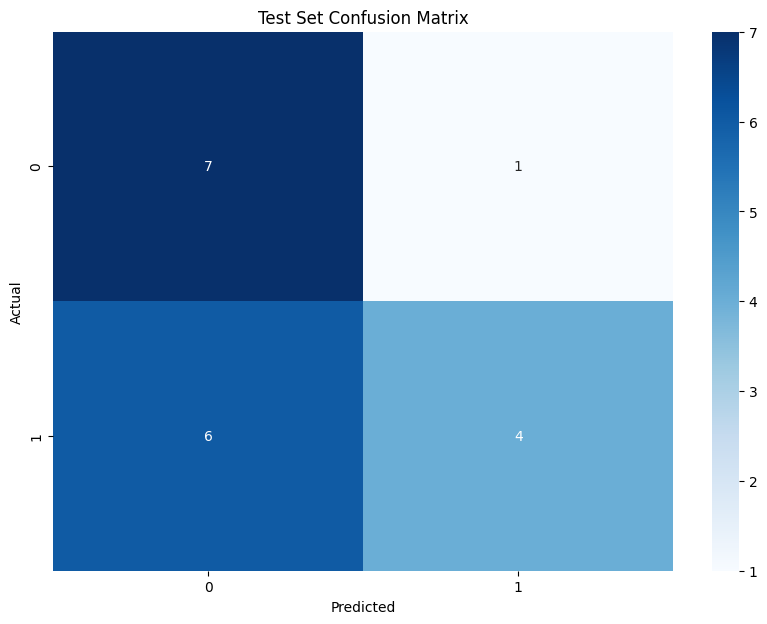

Training Accuracy: 0.9142857142857143
Training Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        42
           1       1.00      0.79      0.88        28

    accuracy                           0.91        70
   macro avg       0.94      0.89      0.91        70
weighted avg       0.93      0.91      0.91        70



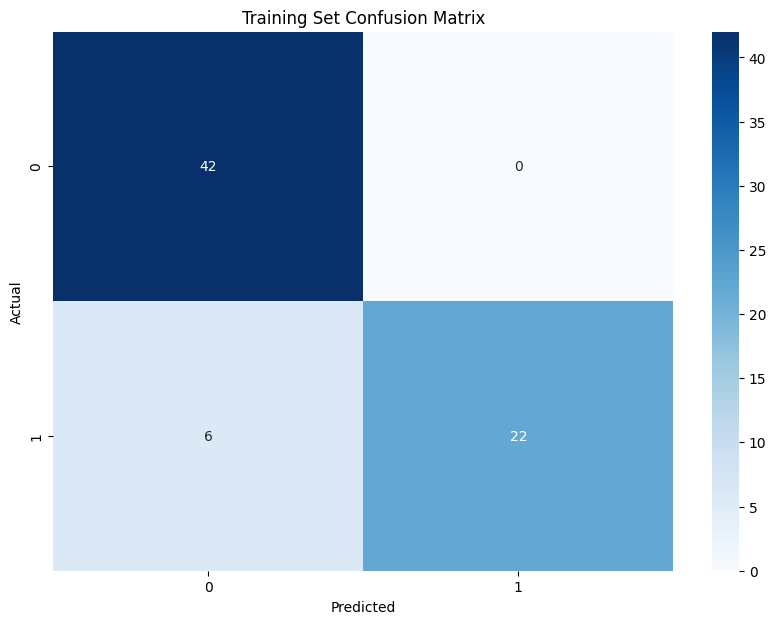

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define paths to the directories containing the images
base_dir = '/content/drive/MyDrive/Scoliosis/Threshold'
normal_dir = os.path.join(base_dir, 'Normal')
scoliosis_dir = os.path.join(base_dir, 'Scoliosis')

# Function to load and extract features
def load_images_and_extract_features(image_dir, label, image_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', 'tif')):
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)  # Resize to a fixed size
            image = image / 255.0  # Normalize pixel values
            features = image.flatten()  # Flatten the image
            images.append(features)
            labels.append(label)
    return images, labels

# Load and preprocess images
normal_images, normal_labels = load_images_and_extract_features(normal_dir, 0)
scoliosis_images, scoliosis_labels = load_images_and_extract_features(scoliosis_dir, 1)

# Combine the images and labels
features = np.array(normal_images + scoliosis_images)
labels = np.array(normal_labels + scoliosis_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the XGBoost model with regularization parameters
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=1000,  # Increase number of estimators
    learning_rate=0.01,  # Reduce learning rate
    max_depth=6,
    min_child_weight=5,  # Increase min child weight
    reg_lambda=10,  # Add L2 regularization
    reg_alpha=5,  # Add L1 regularization
    early_stopping_rounds=50  # Enable early stopping
)

# Train the model with early stopping
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=True) # Removed eval_metric from fit method


# Evaluate on test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Detailed classification report for the test set
test_report = classification_report(y_test, y_test_pred)
print("Test Classification Report:")
print(test_report)

# Confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate on training set
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Detailed classification report for the training set
train_report = classification_report(y_train, y_train_pred)
print("Training Classification Report:")
print(train_report)

# Confusion matrix for the training set
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Training Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Class distribution:
{0: 50, 1: 38}
Test Accuracy: 0.4444444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.62      0.50         8
           1       0.50      0.30      0.37        10

    accuracy                           0.44        18
   macro avg       0.46      0.46      0.44        18
weighted avg       0.46      0.44      0.43        18



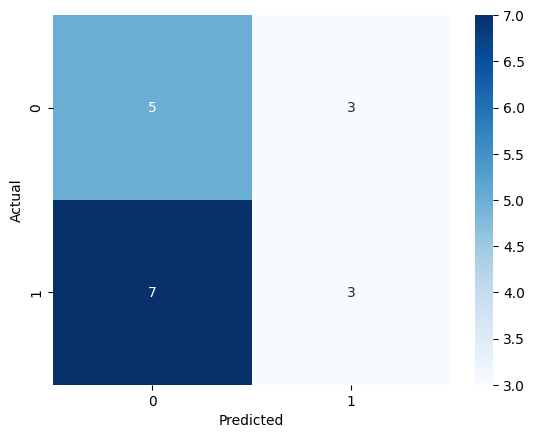

Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.96      0.98        28

    accuracy                           0.99        70
   macro avg       0.99      0.98      0.99        70
weighted avg       0.99      0.99      0.99        70



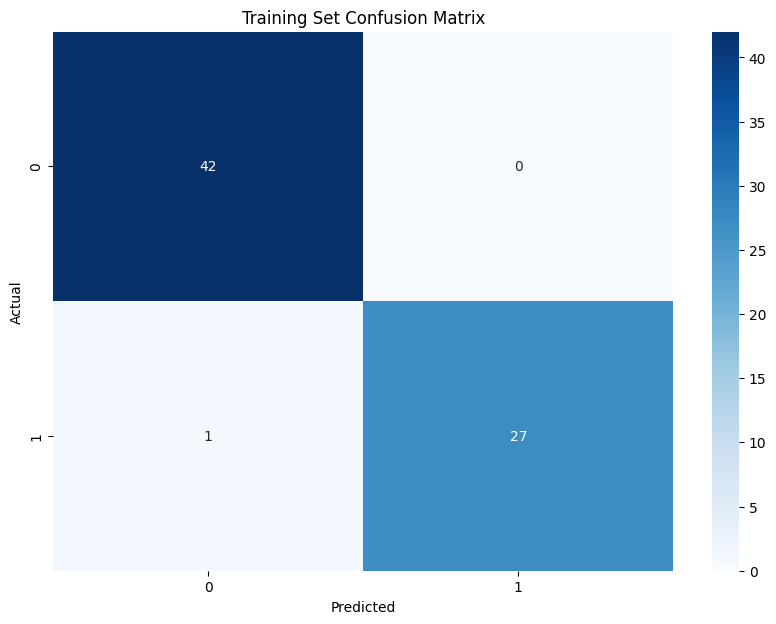

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
unique, counts = np.unique(labels, return_counts=True)
print(f"Class distribution:\n{dict(zip(unique, counts))}")

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
train_report = classification_report(y_train, y_train_pred)
print("Training Classification Report:")
print(train_report)

# Confusion matrix for the training set
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Training Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()